# Preparando o ambiente

## Importação de bibliotecas

Nesta etapa iremos efetuar a importação das bibliotecas usadas no tratamento e analise de imagens

In [5]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from scipy.ndimage import shift
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

## Preparando a pasta de arquivos para comportar o dataset

In [6]:
data_paths = ['data/raw/images','data/processed/images']
print("Efetuando a criação das pastas necessárias para comportar o projeto de tratamento de imagens")
for path in data_paths:
    try:
        print(f"Tentando criar o diretório {path}.")
        os.makedirs(path)
        print(f"O diretório {path} foi criado com sucesso!!")
    except FileExistsError as e:
        print(f"O diretório {path} já existe, nada será feito!!")
    except Exception as e:
        print(f"Erro inesperado ao tentar criar o diretório {path}: {e}.")

Efetuando a criação das pastas necessárias para comportar o projeto de tratamento de imagens
Tentando criar o diretório data/raw/images.
O diretório data/raw/images foi criado com sucesso!!
Tentando criar o diretório data/processed/images.
O diretório data/processed/images já existe, nada será feito!!


# Extração de dados

Nesta etapas iremos efetuar a extração do conjunto de dados disponível no TensorFlow datasets (TFDS), que são dados prontos para uso com o TensorFlow, Jax e outras estruturas de Machine Learning.

In [7]:
# lista de datasets disponíveis para a extração
dataset_list = tfds.list_builders()

Optamos por escolher o dataset oxford_iiit_pet, o qual é um conjunto de dados de imagens de animais de estimação de 37 categorias com aproximadamente 200 imagens para cada classe. As imagens tem grandes variações de escala, pose e iluminação. Todas as imagens têm uma anotação de fundo de raça associada.

In [8]:
#carregamento dos dados
dataset_name = "oxford_iiit_pet"
ds_train = tfds.load(name='oxford_iiit_pet',
                     data_dir='data/raw/images',
                     split='train[:10%]',
                     as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:   0%|          | 0/2 [00:00<?, ? url/s]


# Transformação dos dados

In [ ]:
#conversão array numpy
def image_to_numpy(image):
    with tf.compat.v1.Session() as sess:
        return sess.run(image)

In [ ]:
#mapeamento de rotulo
def map_label(label):
    return "gato" if label == 0 else "cachorro"

In [ ]:
#pré processamento imagem e rótulo e converte para numpy
def preprocess_example(example):
    example["especie"] = map_label(example["label"])
    del example["label"]
    # Converter a imagem para um array NumPy
    example["image"] = image_to_numpy(example["image"])
    return example

In [ ]:
#função para separa especies
def filter_function(image, label):
    return label == species

In [ ]:
#função para plotar gatos de cachorros do dataset com sua respectiva legenda
def display_examples(dataset, num_examples=5):
    for image, label in dataset.take(num_examples):
        plt.figure()
        plt.imshow(image.numpy().squeeze(), cmap='gray')
        plt.title('Gato' if label.numpy() == 0 else 'Cachorro')
        plt.axis('off')
        plt.show()



Exemplos de imagens de gatos do conjunto de treinamento (antes do aumento e inversão):


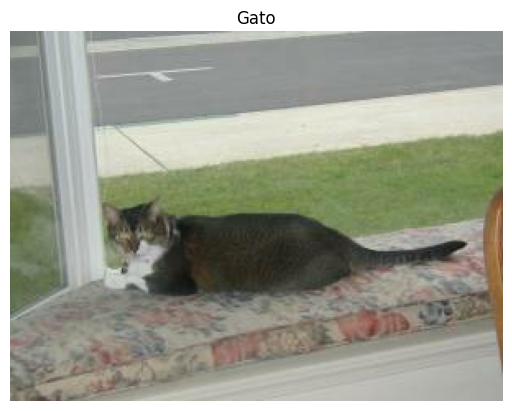

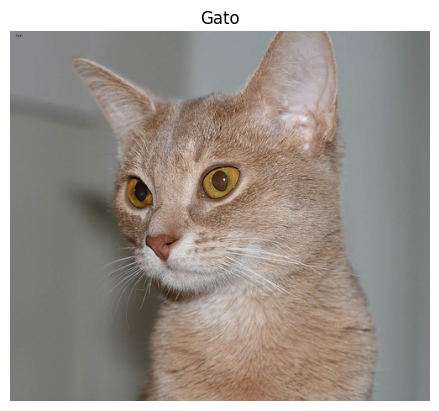

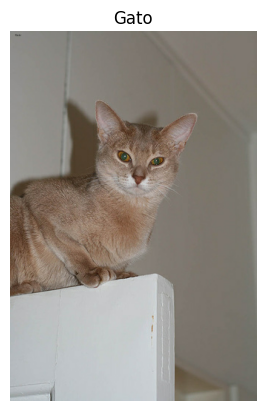

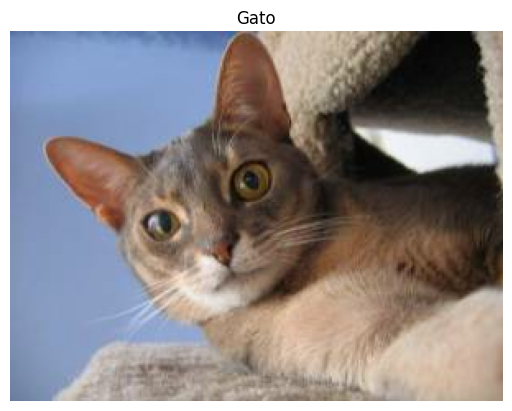

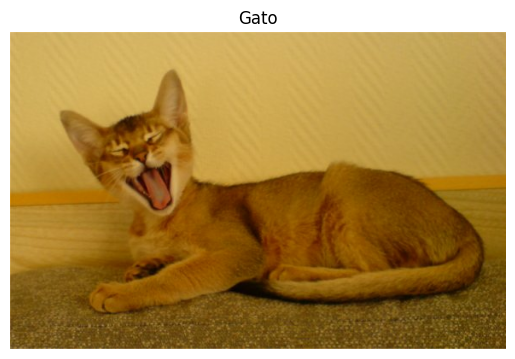

In [ ]:
print("\nExemplos de imagens de gatos do conjunto de treinamento :")
cat_images_train = ds_train.filter(filter_by_species(0))
display_examples(cat_images_train)


Exemplos de imagens de cachorros do conjunto de treinamento :


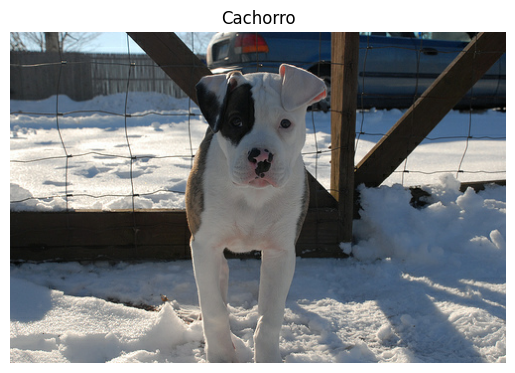

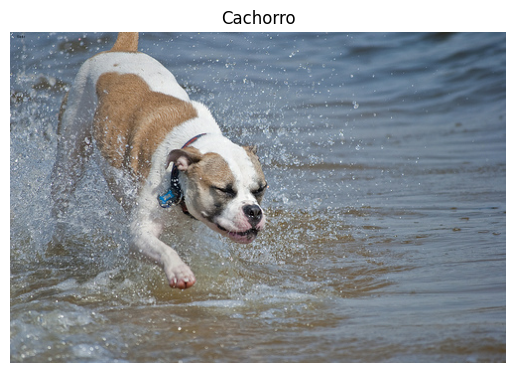

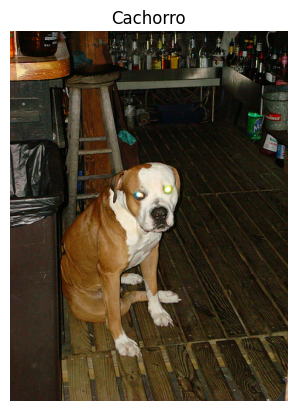

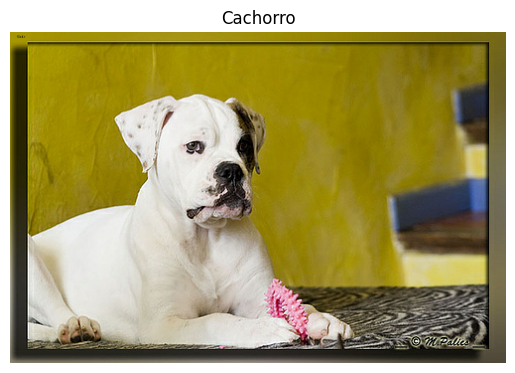

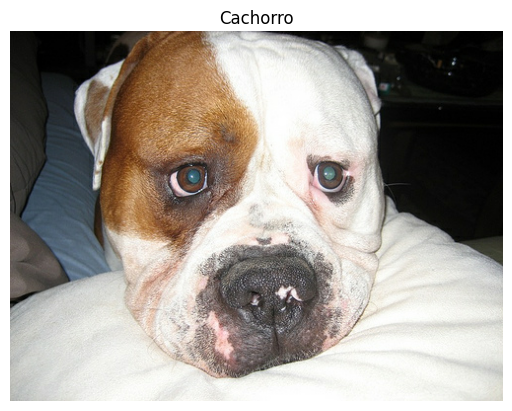

In [ ]:
print("\nExemplos de imagens de cachorros do conjunto de treinamento :")
dog_images_train = ds_train.filter(filter_by_species(1))
display_examples(dog_images_train)

In [ ]:
#função de inversão horizontal
def invert_image(image):
    if len(image.shape) < 2:
        raise ValueError("A imagem precisa ter pelo menos duas dimensões.")

    inverted_image = np.fliplr(image)

    return inverted_image

In [ ]:
#função plotaar imagem
def mostrar_imagem(imagem, titulo=''):
    plt.title(titulo)
    plt.imshow(imagem)
    plt.show()

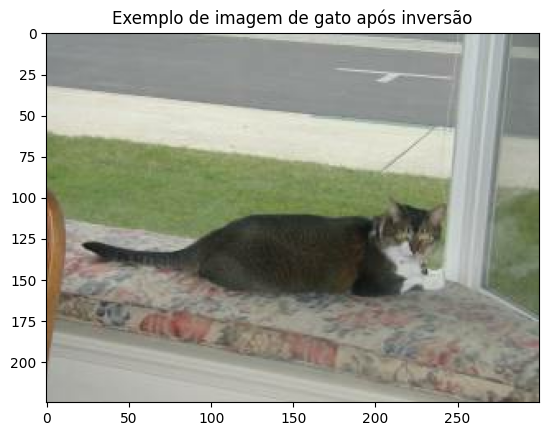

In [ ]:
example_image = next(iter(cat_images_train))[0]
inverted_example_image = invert_image(example_image)
mostrar_imagem(inverted_example_image, "Exemplo de imagem de gato após inversão")

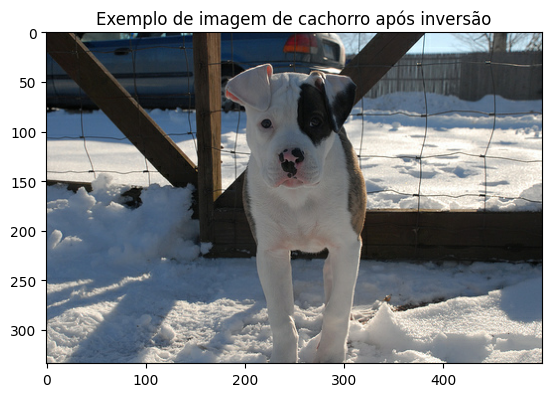

In [ ]:
example_image = next(iter(dog_images_train))[0]
inverted_example_image = invert_image(example_image)
mostrar_imagem(inverted_example_image,"Exemplo de imagem de cachorro após inversão" )

In [ ]:
#função de rotação
def rotate_image(image, angle):

    angle_rad = np.deg2rad(angle)
    rotated_image = np.rot90(image, k=int(angle_rad / (0.5 * np.pi)))
    return rotated_image

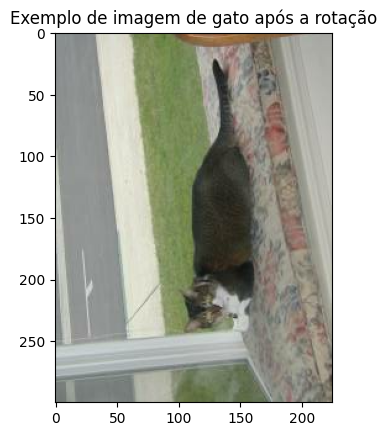

In [ ]:
#exemplo de imagem rotacionada
example_image = next(iter(cat_images_train))[0]
rotated_example_image = rotate_image(example_image, 90)
mostrar_imagem(rotated_example_image,"Exemplo de imagem de gato após a rotação")


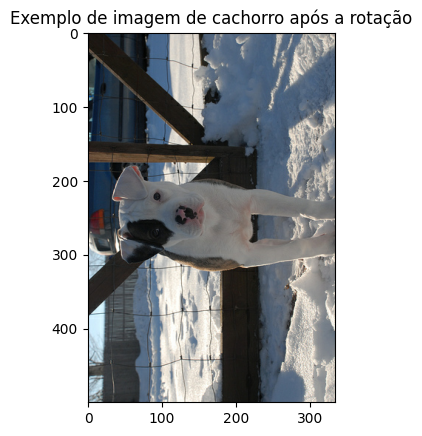

In [ ]:
#exemplo de imagem rotacionada
example_image = next(iter(dog_images_train))[0]
rotated_example_image = rotate_image(example_image, 90)
mostrar_imagem(rotated_example_image,"Exemplo de imagem de cachorro após a rotação")



In [ ]:
#função para mudança de cor da imagem
def change_color(image, fator):
    # Multiplica cada canal de cor pelo fator para reduzir a intensidade da cor
    colored_image = image * np.uint8(fator * 255)
    return colored_image

<ipython-input-101-c14841ba8475>:4: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 510 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  colored_image = image * np.uint8(fator * 255)


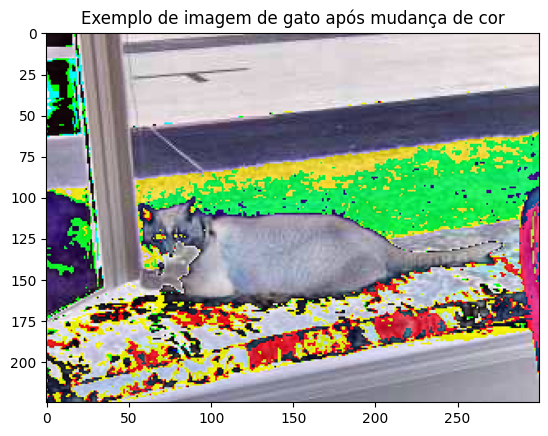

In [ ]:
#exemplo de imagem após mudança de cor
fator=2
example_image = next(iter(cat_images_train))[0]
colored_example_image = change_color(example_image, fator=fator)
mostrar_imagem(colored_example_image, "Exemplo de imagem de gato após mudança de cor")


In [ ]:
#chamada  para todas as modificações juntas.
def apply_all_modifications(image):
    inverted_image = invert_image(image)
    rotated_image = rotate_image(image, 90)
    colored_image = change_color(image, fator=0.5)
    return inverted_image, rotated_image, colored_image

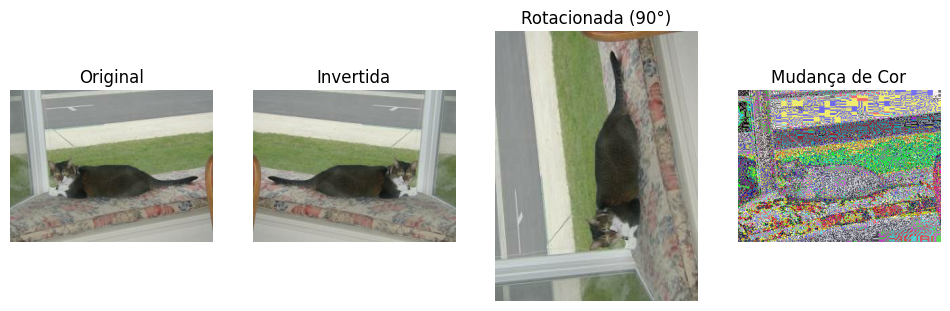

In [ ]:
#exemlo de cada modificação
example_image = next(iter(cat_images_train))[0]
inverted_example_image, rotated_example_image, colored_example_image = apply_all_modifications(example_image)
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(example_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Invertida")
plt.imshow(inverted_example_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Rotacionada (90°)")
plt.imshow(rotated_example_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Mudança de Cor")
plt.imshow(colored_example_image, cmap='gray')
plt.axis('off')

plt.show()

In [ ]:
#função de combinação de modificações
def apply_all_modifications_combined(image):
    inverted_image = invert_image(image)
    rotated_image = rotate_image(inverted_image, 90)
    colored_image = change_color(rotated_image, fator=0.5)
    return inverted_image, rotated_image, colored_image

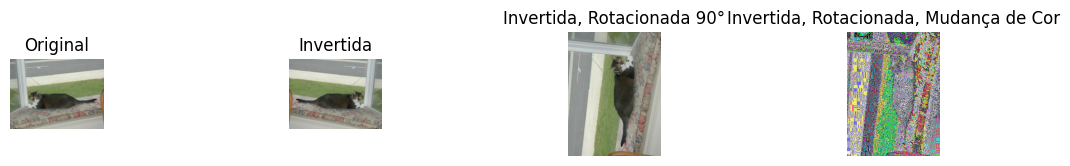

In [ ]:
# exemplo de imagem após todas as modificações combinadas mas mostrando cada modificação de uma vez
inverted_combined_image, rotated_combined_image, colored_combined_image = apply_all_modifications_combined(example_image)

plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(example_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Invertida")
plt.imshow(inverted_combined_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Invertida, Rotacionada 90°")
plt.imshow(rotated_combined_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Invertida, Rotacionada, Mudança de Cor")
plt.imshow(colored_combined_image, cmap='gray')
plt.axis('off')

plt.subplots_adjust(wspace=2, hspace=10)
plt.show()

In [ ]:
#deslocamento imagem
def shift_image(image, shift_x, shift_y):
    shifted_image = np.roll(image, shift=(shift_x, shift_y), axis=(0, 1))
    return shifted_image

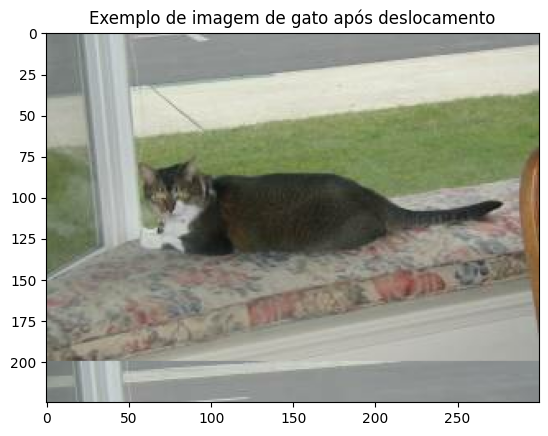

In [ ]:
example_image = next(iter(cat_images_train))[0]
shifted_example = shift_image(example_image, shift_x=200, shift_y=0)
mostrar_imagem(shifted_example,"Exemplo de imagem de gato após deslocamento")


In [ ]:
#Função deslocamento com corte
def shift(image, shift_amount):
    if len(image.shape) != 3:
        raise ValueError("A imagem deve ser 3D.")

    shifted_image = np.zeros_like(image)

    rows, cols, _ = image.shape
    row_shift, col_shift = shift_amount
    min_row = max(0, row_shift)
    max_row = min(rows, rows + row_shift)
    min_col = max(0, col_shift)
    max_col = min(cols, cols + col_shift)

    new_rows = max_row - min_row
    new_cols = max_col - min_col
    orig_rows = max_row - min_row
    orig_cols = max_col - min_col
    shifted_image[min_row:max_row, min_col:max_col, :] = image[:orig_rows, :orig_cols, :]

    return shifted_image

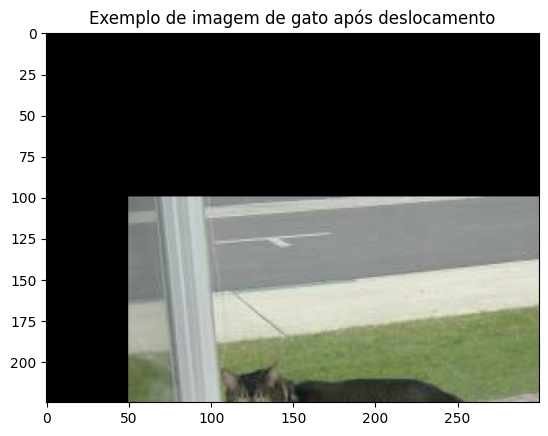

In [ ]:
shift_amount = (100, 50 )
example_image = next(iter(cat_images_train))[0]
shifted_example_image = shift(example_image, shift_amount)
mostrar_imagem(shifted_example_image, "Exemplo de imagem de gato após deslocamento")


In [ ]:
def shift_image_bg(image, shift_amount, background_color):
    shifted_image = np.ones_like(image) * background_color
    shift_rows, shift_cols = shift_amount
    start_row, end_row = max(0, shift_rows), min(image.shape[0] + shift_rows, shifted_image.shape[0])
    start_col, end_col = max(0, shift_cols), min(image.shape[1] + shift_cols, shifted_image.shape[1])
    shifted_image[start_row:end_row, start_col:end_col] = image[max(0, -shift_rows):min(image.shape[0], shifted_image.shape[0] - shift_rows),
                                                              max(0, -shift_cols):min(image.shape[1], shifted_image.shape[1] - shift_cols)]
    return shifted_image

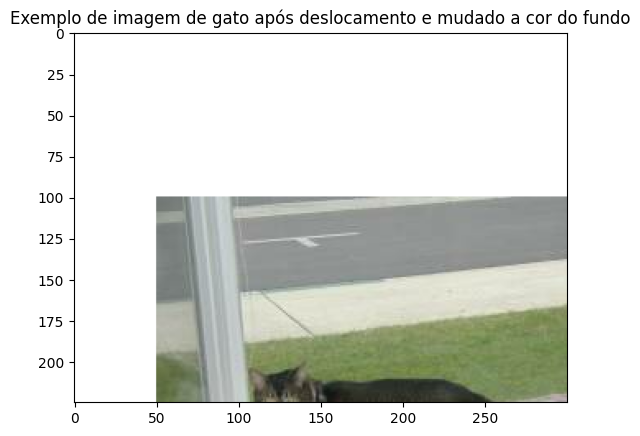

In [ ]:
shift_amount = (100, 50)
example_image = next(iter(cat_images_train))[0]
shifted_bg_example_image = shift_image_bg(example_image, shift_amount, 255)
mostrar_imagem(shifted_bg_example_image, "Exemplo de imagem de gato após deslocamento e mudado a cor do fundo")

In [ ]:
#função achatamento imagem horizontal
def flatten_image(image, size):
    flattened_image = ndimage.zoom(image, (1, size, 1))
    return flattened_image

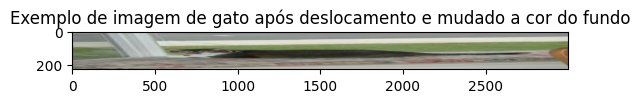

In [ ]:
example_image = next(iter(cat_images_train))[0]
flattened_example_image = flatten_image(example_image, 10)
mostrar_imagem(flattened_example_image, "Exemplo de imagem de gato após deslocamento e mudado a cor do fundo")

In [ ]:
#função achatamento imagem vertical
def flatten_image(image, size):
    flattened_image = ndimage.zoom(image, ( size, 1, 1))
    return flattened_image

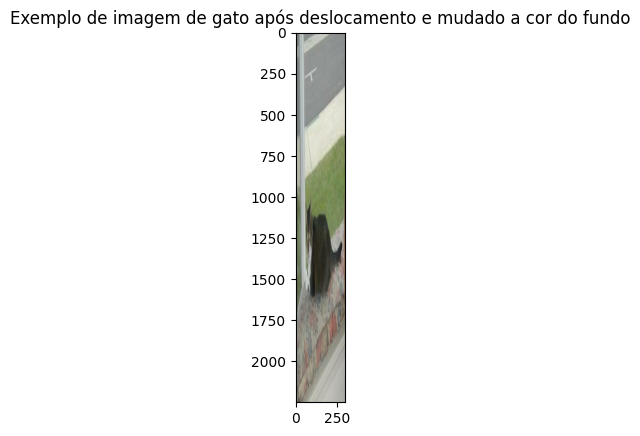

In [ ]:
example_image = next(iter(cat_images_train))[0]
flattened_example_image = flatten_image(example_image, 10)
mostrar_imagem(flattened_example_image, "Exemplo de imagem de gato após deslocamento e mudado a cor do fundo")